## Выбор локации для скважины

Добывающей компании «ГлавРосГосНефть» нужно решить, где бурить новую скважину.
Предоставлены пробы нефти в трёх регионах. Характеристики для каждой скважины в регионе уже известны. 
Задача:
Построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализировать возможную прибыль и риски.

# Шаг. Изучить общую информацию и подготовить данные к исследованию

В начале работы импортируем все необходимые библиотеки.

В переменные reg_0, reg_1, reg_2 сохраним полученные датасеты.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import os

In [2]:
pth1 = '/Users/maksimkeller/Desktop/Jupyter/ml4b/geo_data_0.csv'
pth2 = '/datasets/geo_data_0.csv'
if os.path.exists(pth1):
    reg_0 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    reg_0 = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [3]:
pth1 = '/Users/maksimkeller/Desktop/Jupyter/ml4b/geo_data_1.csv'
pth2 = '/datasets/geo_data_1.csv'
if os.path.exists(pth1):
    reg_1 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    reg_1 = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

In [4]:
pth1 = '/Users/maksimkeller/Desktop/Jupyter/ml4b/geo_data_2.csv'
pth2 = '/datasets/geo_data_2.csv'
if os.path.exists(pth1):
    reg_2 = pd.read_csv(pth1)
elif os.path.exists(pth2):
    reg_2 = pd.read_csv(pth2)
else:
    print("Проверьте правильность пути к датасету")

Изучим полученные датасеты

In [5]:
def intro(element):
    display(element.sample(3))
    print()
    print(element.info())
    print()
    display(element.describe())
    print('Дубликаты в столбце id:', element['id'].duplicated().sum())
   
    pd.plotting.scatter_matrix(element,figsize=(12,12))
    plt.suptitle("Матрица диаграмм зависимостей", size=18)
    plt.show()

## Данные из reg_0

,id,f0,f1,f2,product
73407,Tr4XM,0.268656,-0.131887,3.915281,93.056572
9213,1F4Qj,1.066427,0.238194,4.277783,57.401611
58256,yehSL,1.677491,-0.069402,-1.773552,112.639778



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Дубликаты в столбце id: 10


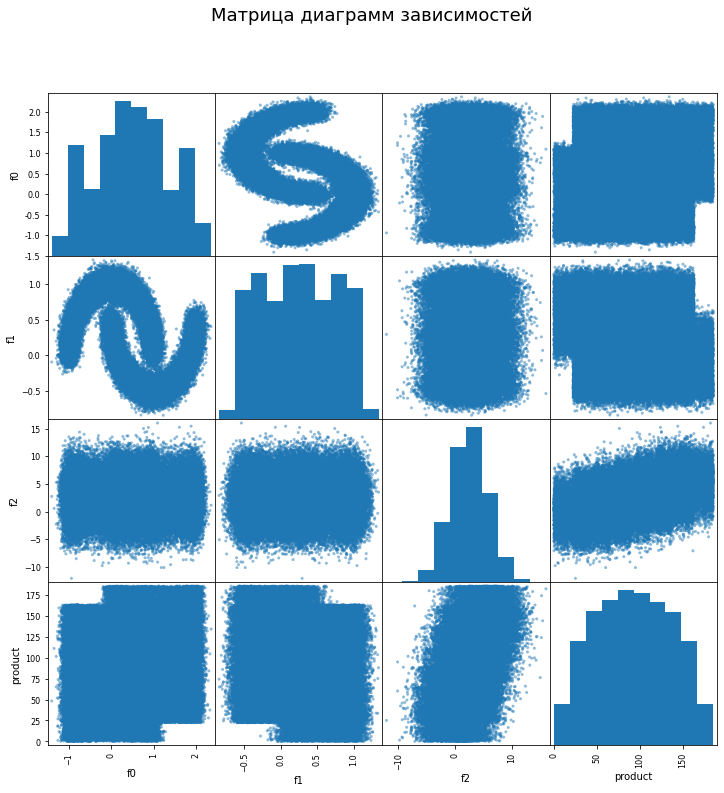

In [6]:
intro(reg_0)

Обратим внимание на диаграмму зависимостей признаков f0 и f1. Очевидно, что между этими признаками существует нелинейная зависимость. Отдельно отметим, что существует связь между признаками f2 и product. Связь между ними слабая положительная.

## Данные из reg_1

,id,f0,f1,f2,product
95708,1vTv7,2.031144,-5.914605,4.003545,107.813044
2643,CxG8p,-11.450962,-11.271410,3.009873,84.038886
37232,E09Y5,-0.647173,-13.613108,3.003137,84.038886



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


Дубликаты в столбце id: 4


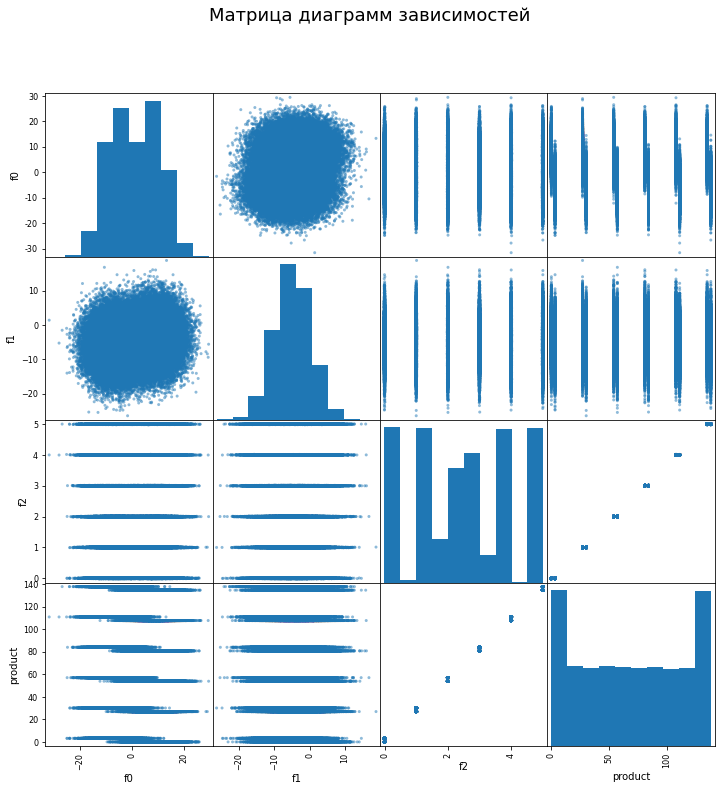

In [7]:
intro(reg_1)

Полученные данные показывают, что существует сильная прямая зависимость между f2 и product.

## Данные из reg_2

,id,f0,f1,f2,product
43449,eQDrS,-1.793095,-1.806239,-0.145052,55.268467
39625,BizGM,-0.058119,1.333458,2.704326,33.977963
1713,I5ZVZ,0.880235,-0.911310,1.799816,95.424083



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None



,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Дубликаты в столбце id: 4


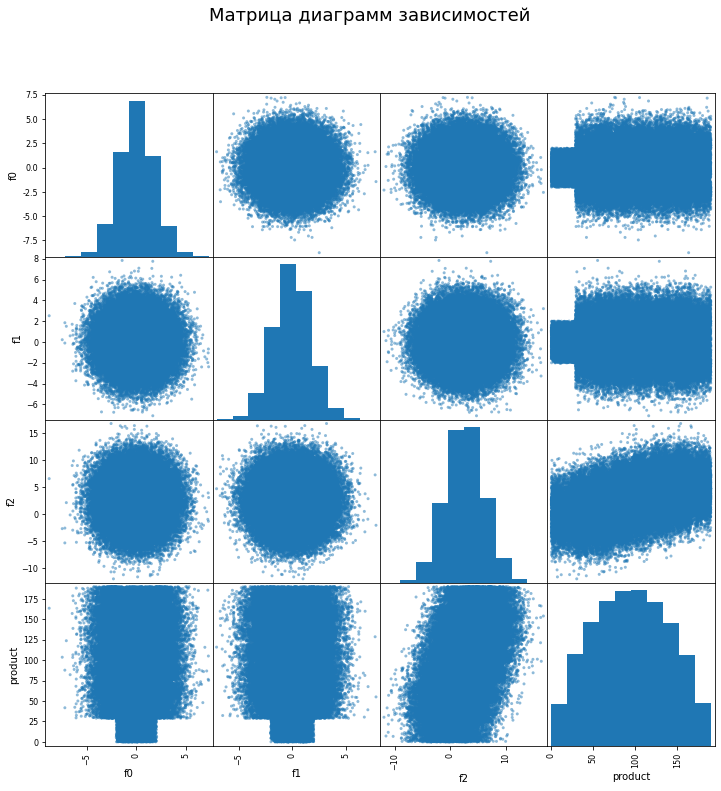

In [8]:
intro(reg_2)

Обратим внимание на диаграмму зависимостей признаков f2 и product. Между ними наблюдается слабая положительная связь.

In [9]:
geo = [reg_0,reg_1,reg_2]
for df in geo:
    df.drop_duplicates(subset='id', keep='first', inplace=True, ignore_index=False)
    df.reset_index(drop=True)

## Вывод

В данном разделе были загружены данные о трёх регионах. Датасеты содержат информацию об объёме запаса нефти в млн. баррелей и трёх численных признаках.
В ходе предварительного анализа, можно обратить внимание на спределение значений признаков в каждом из регионов и отмеить, что только в третьем регионе распределение всех признаков приближено к нормальному. Дополнительно были выявлены и удалены неявные дубликаты.

# Шаг. Обучить и проверить модель для каждого региона.

## Разбить данные на обучающую и валидационную выборки 

In [10]:
def fragmentation(df):
    ''' Разбиение на обучающую и валидационную выборку.
    df - датафрэйм, в котором данные будут разделены на целевой и обучающие признаки'''
    features = df.drop(['id','product'], axis=1)
    target = df['product']
    
    return features,target

In [11]:
features_0,target_0 = fragmentation(reg_0)
features_1,target_1 = fragmentation(reg_1)
features_2,target_2 = fragmentation(reg_2)

In [12]:
def split_df(features,target,region):
    '''Разбиение на обучающую и валидационную выборку.
    features - признаки
    target - целевой призак
    region - регион
    '''
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, train_size= .75,random_state=12345)
    
    display(f'Целевые признаки обучающей и валидационной выборок {region}: {target_train.shape},{target_valid.shape}')
    display(f'Признаки обучающей и валидационной выборок {region}: {features_train.shape},{features_valid.shape}')

    return features_train,features_valid,target_train,target_valid

In [13]:
features_train_0,features_valid_0,target_train_0,target_valid_0 = split_df(features_0,target_0,'reg_0')

'Целевые признаки обучающей и валидационной выборок reg_0: (74992,),(24998,)'

'Признаки обучающей и валидационной выборок reg_0: (74992, 3),(24998, 3)'

In [14]:
features_train_1,features_valid_1,target_train_1,target_valid_1 = split_df(features_1,target_1,'reg_1')

'Целевые признаки обучающей и валидационной выборок reg_1: (74997,),(24999,)'

'Признаки обучающей и валидационной выборок reg_1: (74997, 3),(24999, 3)'

In [15]:
features_train_2,features_valid_2,target_train_2,target_valid_2 = split_df(features_2,target_2,'reg_2')

'Целевые признаки обучающей и валидационной выборок reg_2: (74997,),(24999,)'

'Признаки обучающей и валидационной выборок reg_2: (74997, 3),(24999, 3)'

## Обучить модель и сделать предсказания на валидационной выборке

In [16]:
# Обучим модель и сделаем предсказание по первому региону
model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0) 
predictions_valid_0 = model_0.predict(features_valid_0)
rmse_0 = mean_squared_error(target_valid_0,predictions_valid_0)**0.5

In [17]:
# Обучим модель и сделаем предсказание по второму региону
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1) 
predictions_valid_1 = model_1.predict(features_valid_1)
rmse_1 = mean_squared_error(target_valid_1,predictions_valid_1)**0.5

In [18]:
# Обучим модель и сделаем предсказание по третьему региону
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2) 
predictions_valid_2 = model_2.predict(features_valid_2)
rmse_2 = mean_squared_error(target_valid_2,predictions_valid_2)**0.5

## Рассмотреть средний запас предсказанного сырья и RMSE модели

In [19]:
def part23(prediction,rmse):
    print('Средний запас предсказанного сырья', round(prediction.mean(), 2), 'тысяч баррелей')
    print('Коэффициент RMSE модели', round(rmse,2))

In [20]:
# Данные по первому региону
part23(predictions_valid_0, rmse_0)

Средний запас предсказанного сырья 92.79 тысяч баррелей
Коэффициент RMSE модели 37.85


In [21]:
# Данные по второму региону
part23(predictions_valid_1, rmse_1)

Средний запас предсказанного сырья 69.18 тысяч баррелей
Коэффициент RMSE модели 0.89


In [22]:
# Данные по третьему региону
part23(predictions_valid_2, rmse_2)

Средний запас предсказанного сырья 94.87 тысяч баррелей
Коэффициент RMSE модели 40.08


## Вывод

На данном этапе рассмотрены предсказания моделей `Линейной регрессии` по каждому из регионов.

Важно обратить внимание на очень низкий коэффициент RMSE модели второго региона 0.89. Подобное значение говорит о высокой точности предсказания, в то время как в двух других регионах средне-квадратичная ошибка значительно больше. 
Таким образом, не смотря на то, что согласно предсказаниям, в первом и третьем регионах средний запас нефти выше, этот разрыв может невилироваться величиной ошибки предсказания.

# Шаг. Подготовка к рассчёту прибыли

## Введение ключевых переменных

In [23]:
DEPOSIT = 500
BEST_DEPOSIT = 200
BUDGET_ON_REGION = 10**10
REVENUE_PER_BAR = 450*(10**3)

# переменные, необходимые для дальнейших рассчётов
# DEPOSIT - количество разведываемых месторождений
# BEST_DEPOSIT - количетсво месторождений, которые нужно отобрать из разведываемых
# BUDGET_ON_REGION - бюджет на разработку скважин в регионе — 10 млрд. рублей
# REVENUE_PER_BAR - доход с каждой единицы продукта - 450 т.р.


## Рассчёт достаточного объёма сырья для безубыточной разработки новой скважины

In [24]:
# минимальный объём нефти в месторождении для безубыточной разработки прямопропорционален бюджету разработки и 
# обратнопропорционален количеству исследуемых месторождений и доходу с единицы продукта
MIN_VOLUME = (BUDGET_ON_REGION / BEST_DEPOSIT) / REVENUE_PER_BAR
print('Минимальный объём нефти для безубыточности месторождения',round(MIN_VOLUME, 1), 'тыс. баррелей.')

Минимальный объём нефти для безубыточности месторождения 111.1 тыс. баррелей.


## Вывод

В данном разделе были созданы ключевые переменные, необходимые для дальнейшего исследования и был рассчитан минимальный объём местороождения для безубыточной работы компании.

Важно отметить, что средний объём нефти в исследуемых месторождениях каждого из регионов ниже минимального, однако, в каждом из регионов присутствуют месторождения, имеющие достаточный запас нефти.

# Шаг. Написать функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [46]:
def reg_profit(target, predictions):
    '''
    Данная функция в качестве аргумента берёт:
    target - целевой признак
    predictions - предсказания целевого признака
    и выводит прогнозируемую прибыль по значениям

    predict_sorted = pd.Series(predictions, index = target.index).sort_values(ascending =False)
    selected = target[predict_sorted.index][:BEST_DEPOSIT]
    best_deposit_sum = sum(target[selected.index])
    profit = (best_deposit_sum* REVENUE_PER_BAR) - BUDGET_ON_REGION
    '''
    predict_sorted = pd.Series(predictions, index = target.index).sort_values(ascending =False)
    selected = target[predict_sorted.index][:BEST_DEPOSIT]
    best_deposit_sum = sum(selected)
    profit = (best_deposit_sum* REVENUE_PER_BAR) - BUDGET_ON_REGION
    
    return profit
    

# Шаг. Посчитать риски и прибыль для каждого региона

In [57]:
def bootstrap(target, predictions):
    '''
    Функция применяет технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
    Находит среднюю прибыль, 95%-й доверительный интервал и риск убытков.
    '''
    state = np.random.RandomState(12345)
    
    prediction_series = pd.Series(predictions,index=target.index)

    values = []

    for i in range(1000):
        target_subsample = target.sample(n= DEPOSIT, replace=True, random_state=state)
        prediction_subsample = prediction_series[target_subsample.index]
        values.append(reg_profit(target_subsample, prediction_subsample))
    
    values = pd.Series(values)
    mean_profit = values.mean() / 10**6
    lower = values.quantile(0.025) / 10**6
    upper = values.quantile(0.975) / 10**6
    risks = (values < 0).mean()*100
    
    print('Средняя выручка:', round(mean_profit,2), 'млн. рублей.')
    print('95%-й доверительный интервал находится в промежутке от', round(lower,1), 'до', round(upper,1), 'млн. рублей.')
    print('Вероятность убытков в регионе:', round(risks,2), '%')

In [58]:
bootstrap(target_valid_0,predictions_valid_0)

Средняя выручка: 409.43 млн. рублей.
95%-й доверительный интервал находится в промежутке от -131.5 до 944.4 млн. рублей.
Вероятность убытков в регионе: 7.1 %


In [59]:
bootstrap(target_valid_1,predictions_valid_1)

Средняя выручка: 536.9 млн. рублей.
95%-й доверительный интервал находится в промежутке от 114.5 до 970.8 млн. рублей.
Вероятность убытков в регионе: 0.9 %


In [60]:
bootstrap(target_valid_2,predictions_valid_2)

Средняя выручка: 353.79 млн. рублей.
95%-й доверительный интервал находится в промежутке от -159.2 до 875.7 млн. рублей.
Вероятность убытков в регионе: 10.2 %


## Вывод

В двух предыдущих разделах была создана функция, позволяющая определить 95% доверительный интервал выручки по каждому из трёх регионов, прогнозируемую среднюю выручку и вероятность убытков.


Хотя по всем рассмотренным регионам вероятность убытков не превышает 11%, однако,  в 95% доверительный интервал третьего и второго регионов входят отрицательные значения (средняя выручка может быть ниже вложений в разработку).

Изучение показателей первого региона позволяет сделать вывод о том, что именно этот регион можно считать наиболее перспективным к освоению всвязи с тем, что согласно полученным данным, в этом регионе вероятность убытков ниже, нижнее значение доверительного интервала выше и, что немаловажно, прогнозируемая средняя выручка наибольшая.

# Шаг. Итоговый вывод

В данном исследовании были проанализированы возможная прибыль и риски связанные с добычей нефти в трёх регионах.

На начальном этапе данные были загружены и изучены. Были выведены основные показатели по каждому из регионов, а также матрица диаграмм зависимостей, показавшая наличие некоторых особенностей взаимосвязей признаков.

Было обнаружено, что в каждом из трёх датафреймов содержатся неявные дубликаты, когда id В данном исследовании были изучены скважин совпадают, но значения признаков различаются. Не имея возможности восстановить данные корректно, все дубликаты были удалены.

Далее для каждого из трёх регионов была обучена модель линейной регрессии, после чего были выведены значения RMSE каждой модели. На данном этапе важно отметить, что для второго региона RMSE модели менее 1, что говорит о высоком качестве предсказаний модели.

На следующем этапе была написана функция, реализующая технику Bootstrap с 1000 выборок, позволяющая найти распределение прибыли, 95% доверительный интервал и вероятность убытков.

После применения полученной функции к данным по каждому из регионов, было получено, что наименьшая вероятность убытков во втором регионе. Кроме того, в данном регионе прогнозируемая средняя выручка выше, чем в других регионах, а также наибольшая нижняя граница доверительного интервала. Согласно полученным данным, можно утверждать, что наибольшую прибыль компании способна принести добыча нефти во втором регионе.